In [19]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler



In [20]:
import sys
print(sys.executable)


c:\Users\yadav\anaconda3\envs\ml\python.exe


In [21]:


cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1','fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

df = pd.read_csv('../dataset/magic04.data', names=cols)

df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [22]:
df['class'] = (df['class'] == "g").astype(int)


In [23]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


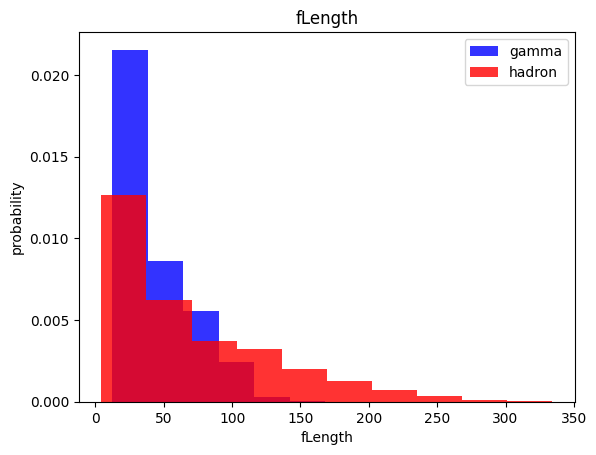

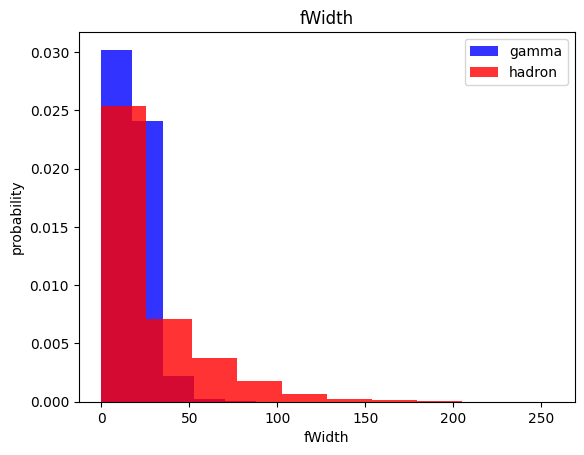

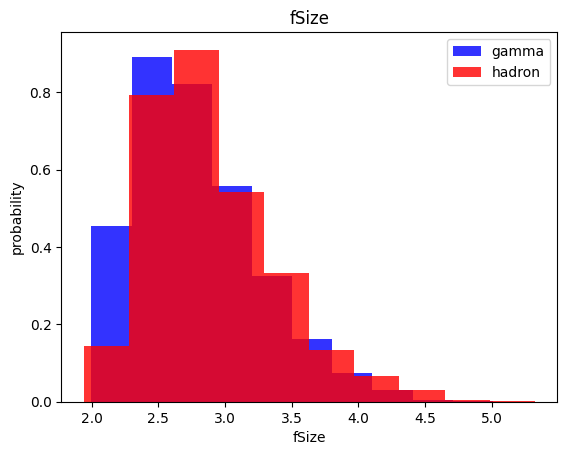

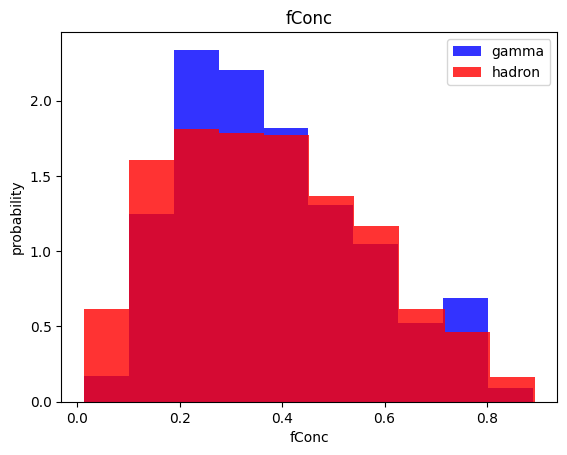

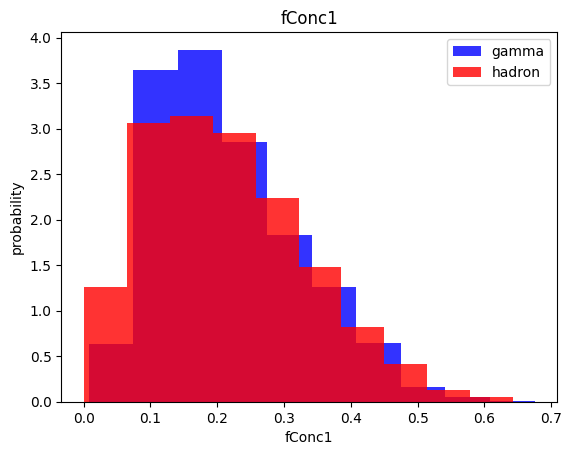

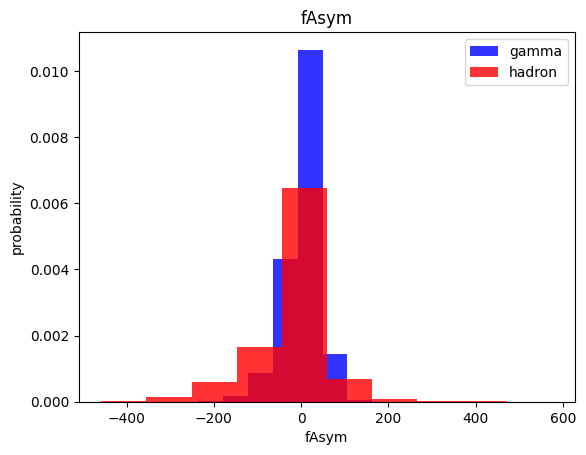

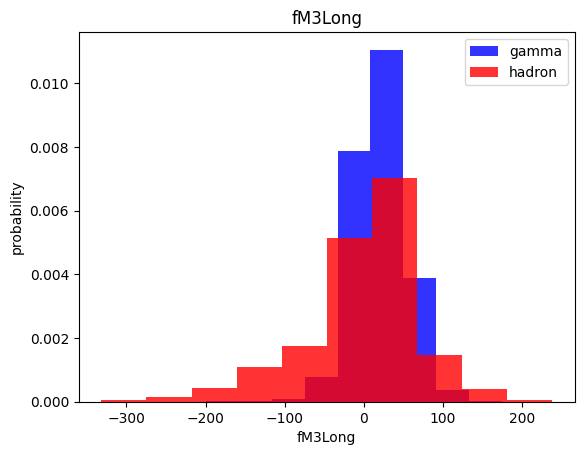

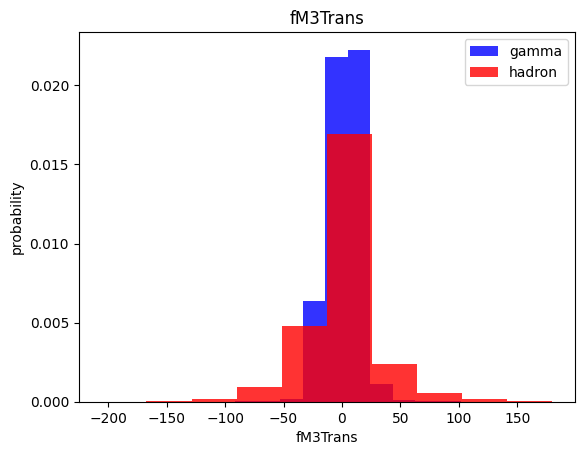

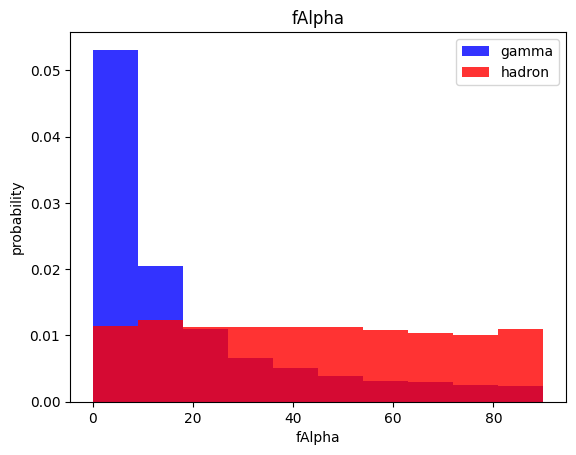

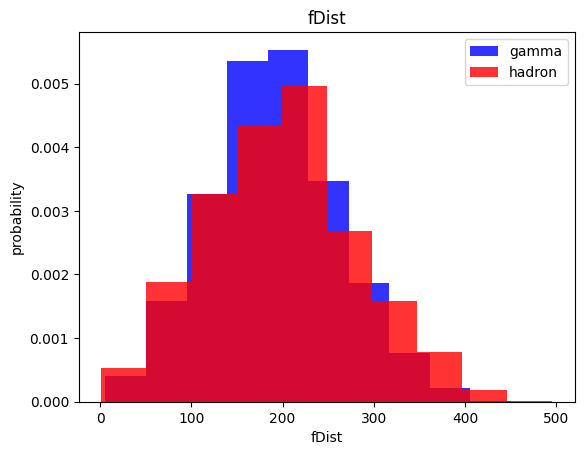

In [24]:
for label in cols[:-1]:
    plt.hist(df[df['class'] == 1][label], color='blue', label='gamma', alpha=0.8, density=True)
    plt.hist(df[df['class'] == 0][label], color='red', label='hadron', alpha=0.8, density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('probability')
    plt.legend()
    plt.show()
    

train , validation , and test dataset

In [25]:
train , valid , test = np.split(df.sample(frac=1 ), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\yadav\anaconda3\envs\ml\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [26]:
def scale_dataset(dataframe ,oversample= False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
        
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

In [27]:
train_scaled, x_train, y_train = scale_dataset(train, oversample=True)
valid_scaled, x_valid ,y_valid = scale_dataset(valid, oversample=False)
test_scaled, x_test, y_test = scale_dataset(test, oversample=False)


# KNeighborsClassifier

- Description  
    K-Nearest Neighbors (KNN) is a non-parametric, instance-based classifier that predicts the class of a sample by majority vote of its k nearest neighbors in feature space.

- When to use  
    - Simple baseline for classification tasks.  
    - Works well for low-dimensional, well-scaled data with clear local structure.

- Key hyperparameters
    - n_neighbors: number of neighbors (k). Prefer odd values for binary classification to avoid ties.  
    - weights: 'uniform' or 'distance' (closer neighbors weigh more).  
    - metric / p: distance metric (e.g., 'minkowski' with p=2 for Euclidean).  
    - algorithm: 'auto', 'ball_tree', 'kd_tree', or 'brute' (depends on dimensionality / dataset size).  
    - leaf_size: affects tree-based algorithms performance.

- Practical notes for this notebook
    - Features are already scaled with StandardScaler — required for sensible distance comparisons.  
    - Oversampling should be applied only on the training set (you used RandomOverSampler on train — correct). Do not oversample validation/test.  
    - KNN can be slow at prediction time for large datasets; consider KD/ball trees or approximate neighbors for large N.  
    - High dimensionality degrades distance-based methods (curse of dimensionality). Consider feature selection or dimensionality reduction if performance is poor.

- Evaluation and tuning tips
    - Tune n_neighbors and weights with cross-validation (use validation set or GridSearchCV on training folds).  
    - Use metrics robust to imbalance (precision, recall, F1, ROC-AUC) in addition to accuracy.  
    - Try both 'uniform' and 'distance' weighting and different metrics (e.g., Manhattan vs Euclidean).

Example GridSearch (run in a code cell):
```python
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [3,5,7,9],
                    'weights': ['uniform','distance'],
                    'metric': ['minkowski','manhattan'],
                    'p': [1,2]}

gs = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='f1', n_jobs=-1)
gs.fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
```

- Diagnostics
    - Inspect confusion matrix and per-class precision/recall to ensure balanced performance.  
    - Use predict_proba for ROC curves and threshold analysis.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [29]:
knn_model = KNeighborsClassifier(n_neighbors= 5)
knn_model.fit(x_train,y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [30]:
y_pred = knn_model.predict(x_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1381
           1       0.85      0.87      0.86      2423

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

- Probabilistic classifier using Bayes' theorem with the (naive) assumption that features are conditionally independent given the class.
- GaussianNB (used in this notebook) models each continuous feature with a Gaussian distribution.
- Pros: very fast to train/predict, works well as a baseline, robust on small datasets.
- Cons: independence and Gaussian assumptions may be violated (correlated features reduce performance).
- Notes for this notebook:
    - Features are scaled with StandardScaler (good for numeric stability).
    - Oversampling should be applied only to the training set (current pipeline uses RandomOverSampler on train).
    - Evaluate with classification_report and inspect per-class precision/recall.
- Tuning: adjust sklearn GaussianNB var_smoothing or consider MultinomialNB / BernoulliNB if features are counts or binary.

In [32]:
from sklearn.naive_bayes import GaussianNB


In [33]:
nb_model = GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [34]:
y_pred =nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1381
           1       0.72      0.90      0.80      2423

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



Logistic Regression

- What it is  
    A simple, fast model for binary classification that predicts the probability of a class using a linear combination of features passed through a sigmoid (logistic) function.

- How it works (intuition)  
    Compute z = w · x + b, convert to probability p = 1 / (1 + e^(-z)). Predict class 1 if p >= 0.5 (threshold adjustable).

- Training  
    Learn weights w and bias b by minimizing binary cross-entropy (maximum likelihood). Regularization (L1/L2) is commonly used to prevent overfitting.

- Strengths  
    - Interpretable coefficients  
    - Outputs calibrated probabilities  
    - Fast to train and predict

- Limitations  
    - Assumes a linear decision boundary  
    - Can underperform on complex, non-linear data without feature engineering

- Practical tips  
    - Scale features (StandardScaler) for stability  
    - Use regularization (C in sklearn) and cross-validation to tune hyperparameters  
    - Inspect coefficients to understand feature impact


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [37]:
y_pred =lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1381
           1       0.84      0.83      0.83      2423

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machine (SVM)

- What it is  
    A supervised binary classifier that finds the best separating line (or hyperplane) between classes by maximizing the margin — the distance between the boundary and the nearest training points (support vectors).

- Intuition (simple)  
    Imagine drawing a line between two groups of points so that the gap on either side is as wide as possible. The points that touch the gap are the support vectors and determine the boundary.

- Non-linear separation (kernel trick)  
    If data is not linearly separable, SVM can implicitly map inputs to a higher-dimensional space using a kernel (e.g., RBF, polynomial) and then find a linear separator there.

- Main hyperparameters
    - C: trade-off between wide margin and classification error (smaller C → wider margin, more regularization).  
    - kernel: 'linear', 'rbf', 'poly', etc.  
    - gamma (for RBF/poly): how far influence of a single training example reaches (higher gamma → more complex boundary).

- When to use
    - Good for small-to-medium datasets and clear margin separation.  
    - Works well in high-dimensional spaces (text, sparse data) with an appropriate kernel.

- Pros / Cons
    - Pros: effective, robust to overfitting with proper C, powerful via kernels.  
    - Cons: slow on very large datasets, needs feature scaling, kernel selection and hyperparameter tuning required.

- Practical tips
    - Always scale features (StandardScaler).  
    - Start with linear kernel; try RBF if non-linear patterns appear.  
    - Tune C and gamma via cross-validation.

In [38]:
from sklearn.svm import SVC

In [39]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [40]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1381
           1       0.89      0.90      0.89      2423

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network using tensor flow

 
 Short, simple explanation + small TensorFlow example showing control over feeding data to the model.
 Neural Networks (very short): a model that learns to map inputs to outputs by adjusting weights from examples.
 TensorFlow gives control over how data is fed (shuffle, batch, prefetch) via tf.data, and lets you run
 either high-level fit() or custom training loops for full control.

print("Neural Networks (short): learn patterns from examples by adjusting weights.")
print("TensorFlow control: use tf.data for batching/shuffling/prefetching or write custom training loops.")

# Create efficient input pipelines with tf.data (uses x_train, y_train, x_valid, y_valid from the notebook)
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)

valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).batch(64).prefetch(tf.data.AUTOTUNE)

# Small model to demonstrate feeding the dataset to fit()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train using dataset objects (this shows control over data feeding)
history = model.fit(train_ds, epochs=3, validation_data=valid_ds, verbose=1)

# Minimal custom training loop sketch (gives lowest-level control over batches/updates)
optimizer = tf.keras.optimizers.Adam()
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)

for epoch in range(2):
    for step, (bx, by) in enumerate(train_ds.take(100)):  # iterate batches manually
        with tf.GradientTape() as tape:
            preds = model(bx, training=True)
            loss = bce(by, preds)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    print(f"Epoch {epoch+1} completed")

In [41]:
import tensorflow as tf


🚀 Training: nodes=16, dropout=0, lr=0.01, batch=32


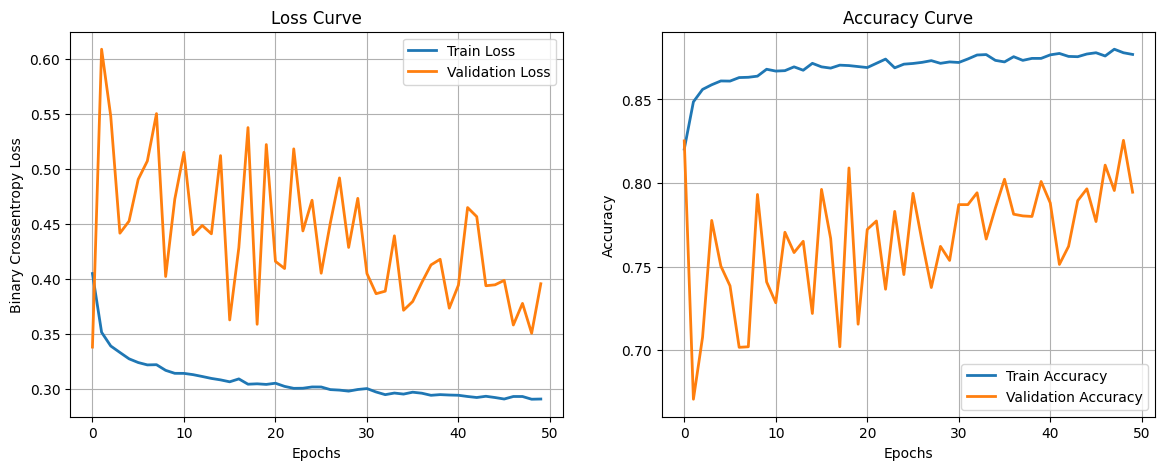

✔️ Train Loss = 0.2905, Train Acc = 0.8769
✔️ Val Loss   = 0.3174, Val Acc   = 0.8651

🚀 Training: nodes=16, dropout=0, lr=0.01, batch=64


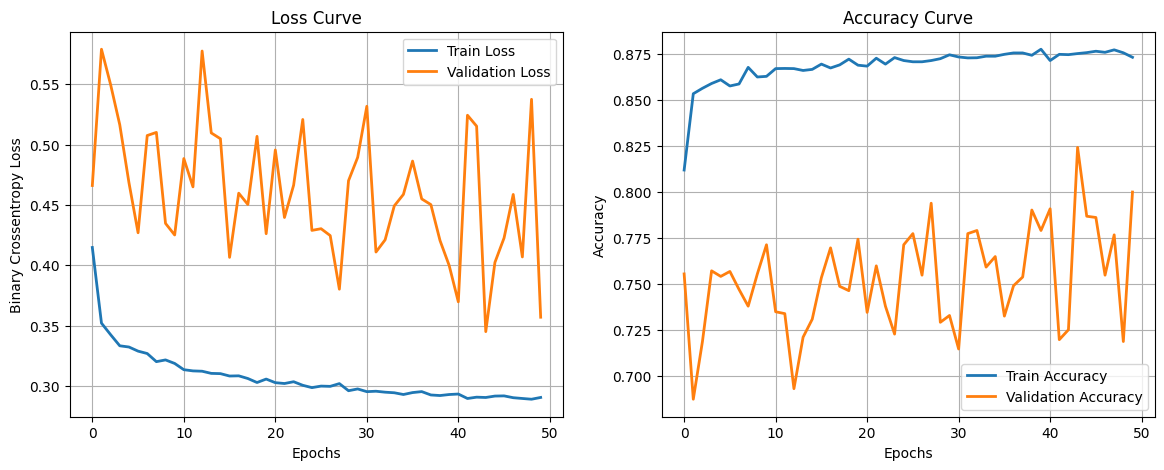

✔️ Train Loss = 0.2906, Train Acc = 0.8732
✔️ Val Loss   = 0.3365, Val Acc   = 0.8628

🚀 Training: nodes=16, dropout=0, lr=0.01, batch=128


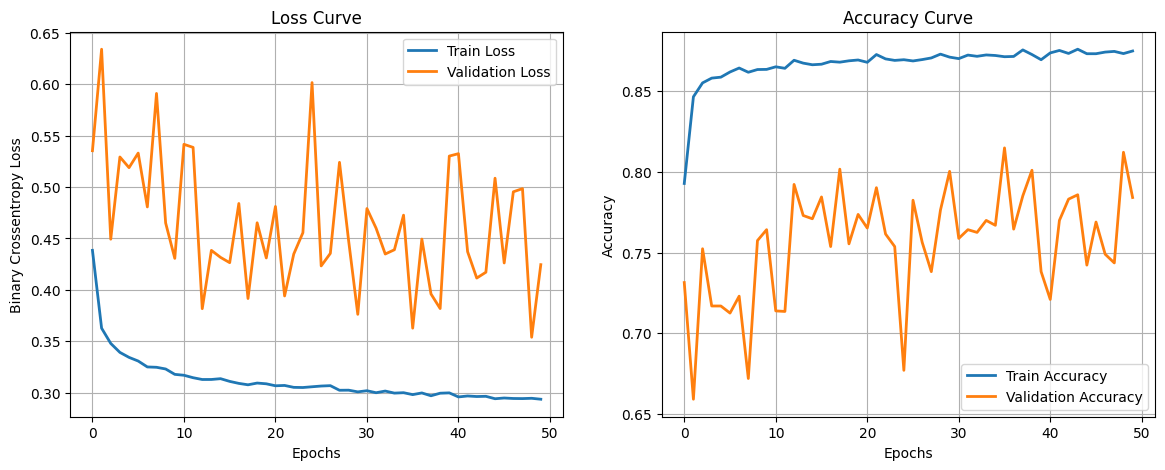

✔️ Train Loss = 0.2935, Train Acc = 0.8747
✔️ Val Loss   = 0.3318, Val Acc   = 0.8601

🚀 Training: nodes=16, dropout=0, lr=0.005, batch=32


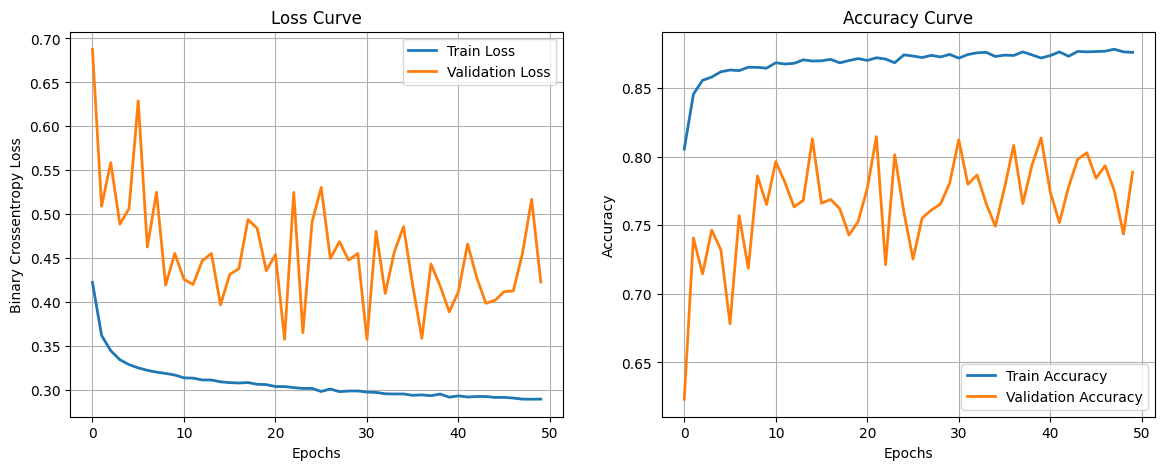

✔️ Train Loss = 0.2898, Train Acc = 0.8763
✔️ Val Loss   = 0.3213, Val Acc   = 0.8675

🚀 Training: nodes=16, dropout=0, lr=0.005, batch=64


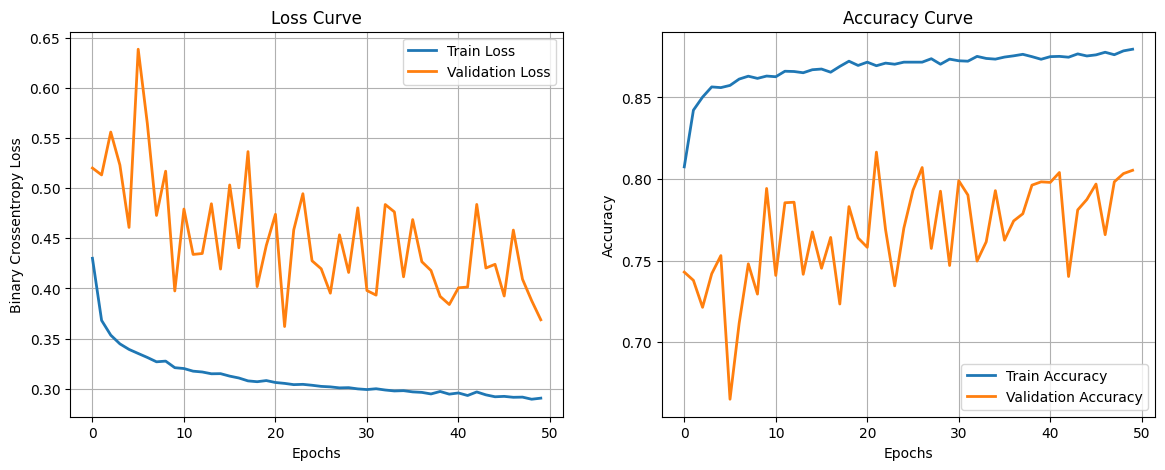

✔️ Train Loss = 0.2905, Train Acc = 0.8796
✔️ Val Loss   = 0.3314, Val Acc   = 0.8604

🚀 Training: nodes=16, dropout=0, lr=0.005, batch=128


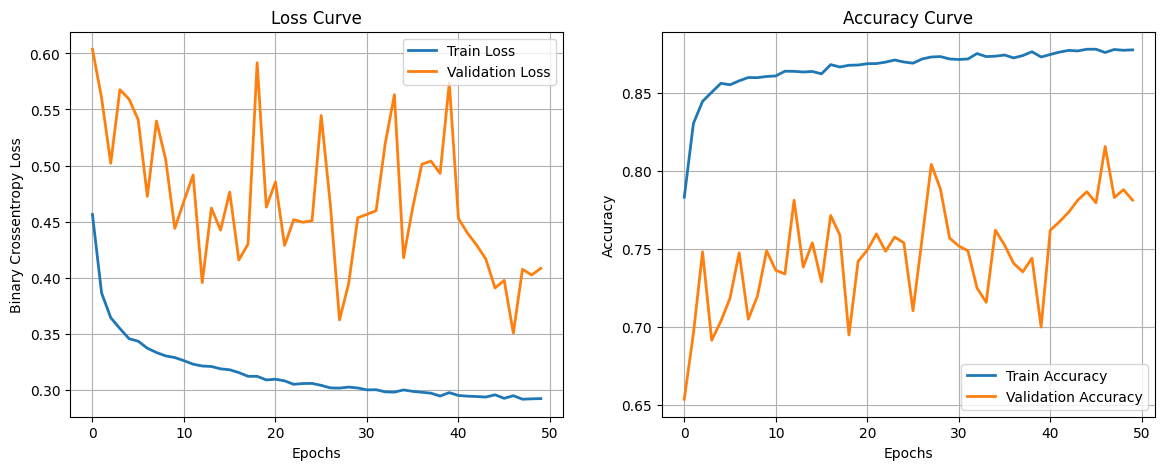

✔️ Train Loss = 0.2921, Train Acc = 0.8777
✔️ Val Loss   = 0.3090, Val Acc   = 0.8688

🚀 Training: nodes=16, dropout=0, lr=0.001, batch=32


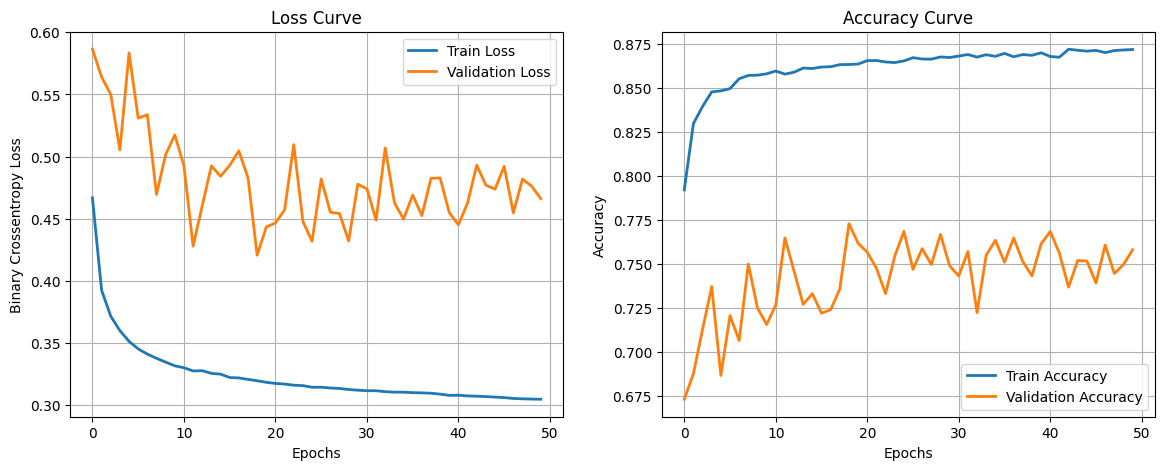

✔️ Train Loss = 0.3049, Train Acc = 0.8720
✔️ Val Loss   = 0.3145, Val Acc   = 0.8667

🚀 Training: nodes=16, dropout=0, lr=0.001, batch=64


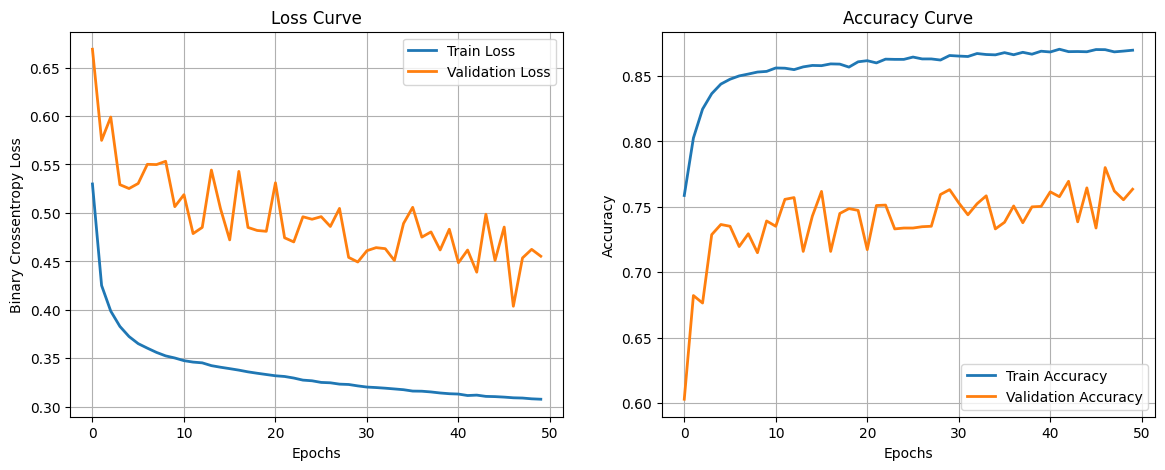

✔️ Train Loss = 0.3078, Train Acc = 0.8698
✔️ Val Loss   = 0.3127, Val Acc   = 0.8659

🚀 Training: nodes=16, dropout=0, lr=0.001, batch=128


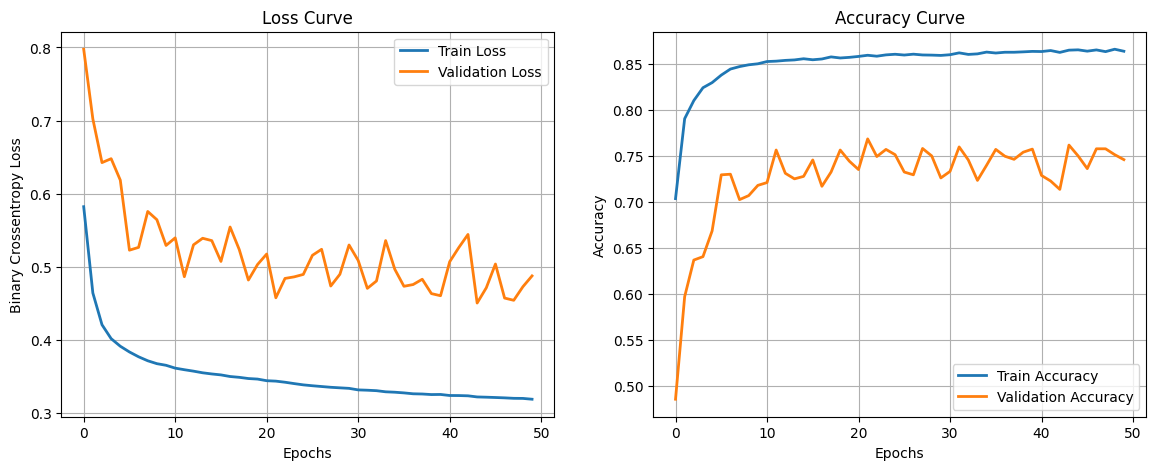

✔️ Train Loss = 0.3192, Train Acc = 0.8643
✔️ Val Loss   = 0.3206, Val Acc   = 0.8704

🚀 Training: nodes=16, dropout=0.2, lr=0.01, batch=32


KeyboardInterrupt: 

In [48]:
import matplotlib.pyplot as plt
import tensorflow as tf

# ------------------------- PLOTS -------------------------

def plot_graphs(history):
    """Plot training & validation loss and accuracy."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Loss plot
    ax1.plot(history.history['loss'], label='Train Loss', linewidth=2)
    ax1.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    ax1.set_title("Loss Curve")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Binary Crossentropy Loss")
    ax1.legend()
    ax1.grid(True)

    # Accuracy plot
    ax2.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    ax2.set_title("Accuracy Curve")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.legend()
    ax2.grid(True)

    plt.show()


# ------------------------- MODEL -------------------------

def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    """Build, compile, and train model."""
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0   # silent training
    )

    return model, history


# ------------------- HYPERPARAMETER SEARCH -------------------

least_val_loss = float('inf')
best_model = None
results = []

epochs = 50  # reduce if training takes long

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:

                print(f"\n🚀 Training: nodes={num_nodes}, dropout={dropout_prob}, lr={lr}, batch={batch_size}")

                model, history = train_model(
                    x_train, y_train,
                    num_nodes, dropout_prob,
                    lr, batch_size, epochs
                )

                # SHOW GRAPH HERE 🔥🔥🔥
                plot_graphs(history)

                # Extract final metrics
                train_loss = history.history['loss'][-1]
                train_acc = history.history['accuracy'][-1]

                val_loss, val_acc = model.evaluate(x_valid, y_valid, verbose=0)

                print(f"✔️ Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}")
                print(f"✔️ Val Loss   = {val_loss:.4f}, Val Acc   = {val_acc:.4f}")

                # Save results
                results.append({
                    "nodes": num_nodes,
                    "dropout": dropout_prob,
                    "lr": lr,
                    "batch_size": batch_size,
                    "train_loss": train_loss,
                    "train_acc": train_acc,
                    "val_loss": val_loss,
                    "val_acc": val_acc
                })

                # Track best model
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    best_model = model


print("\n🔥 BEST VALIDATION LOSS:", least_val_loss)

print("\n📊 ALL RESULTS:")
for r in results:
    print(r)


In [ ]:
y_pred = best_model.predict(x_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)
y_pred

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([1, 1, 1, ..., 0, 1, 0], shape=(3804,))

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1381
           1       0.87      0.93      0.90      2423

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

